<a href="https://colab.research.google.com/github/gulcan-dgn/london-crime-rate/blob/main/london_crime_rate_all_years_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series
A time series is a sequential set of data points measured typically over successive times.
It is mathematically defined as a set of vectors x(t), t = 0,1,2,... where t represents the time elapsed.
The variable x(t) is treated as a random variable.
The measurements taken during an event in a time series are arranged in a proper chronological order.
A time series containing records of a single variable is termed as univariate, and more than one variable a multivariate.
**Business use cases of time series forecasting**
Sales forecast - retail products sales forecast
Demand forecasting - used in pricing, inventory and workforce management
Traffic forecast - transport and route optimization, road facility design
Revenue forecast - budgeting, target setting

In [ ]:
!pip install -q lib5c
!lib5c -v

In [ ]:
pip install pmdarima

# Importing Libraries for time series forecasting


In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

from math import sqrt

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns

from random import random

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

# Importing data

Dataset: london crıme dataset 
Unit: Thousands

In [5]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/GULCAN DOGAN DISERTATION /LONDON CRIME DATA /MPS Borough Level Crime sum .csv',   parse_dates=['DATE'])
print(df.shape)
df.head()


Mounted at /content/drive
(147, 2)


,DATE,IPG2211A2N
0,2010-04-01,67901
1,2010-05-01,69468
2,2010-06-01,70230
3,2010-07-01,71448
4,2010-08-01,66019


In [6]:
df.columns = ['date','crimerate']

In [7]:
df.head(3)
df.tail(5)

,date,crimerate
142,2022-02-01,65935
143,2022-03-01,73716
144,2022-04-01,69096
145,2022-05-01,76315
146,2022-06-01,73352


In [8]:
df.describe()

,crimerate
count,147.000000
mean,65791.680272
std,6439.681068
min,48695.000000
25%,60786.000000
50%,65764.000000
75%,70483.500000
max,81695.000000


In [9]:
df.describe(include = 'all')

,date,crimerate
count,147,147.000000
unique,147,NaN
top,2010-04-01 00:00:00,NaN
freq,1,NaN
first,2010-04-01 00:00:00,NaN
last,2022-06-01 00:00:00,NaN
mean,NaN,65791.680272
std,NaN,6439.681068
min,NaN,48695.000000
25%,NaN,60786.000000


In [10]:
print('Time period start: {}\nTime period end: {}'.format(df.date .min(),df.date .max()))

Time period start: 2010-04-01 00:00:00
Time period end: 2022-06-01 00:00:00


In [11]:
df.columns

Index(['date', 'crimerate'], dtype='object')

In [12]:
df.shape

(147, 2)

# Data Preprocessing and Visualization

In [13]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m')
y = df.set_index('date')
y.index

DatetimeIndex(['2010-04-01', '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01', '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01', '2011-01-01',
               ...
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01'], dtype='datetime64[ns]', name='date', length=147, freq=None)

In [14]:
y.isnull().sum()

crimerate    0
dtype: int64

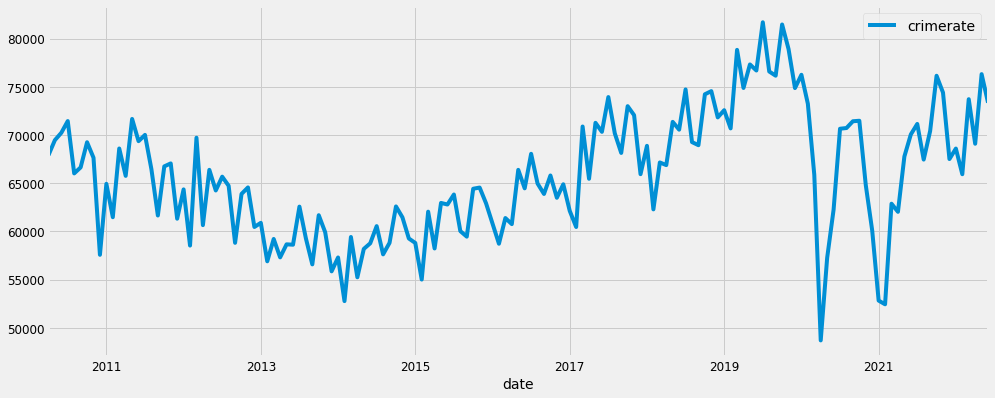

In [15]:
y.plot(figsize=(15, 6))
plt.show()

Reviewing plots of the density of observations can provide further insight into the structure of the data:

The distribution is not perfectly Gaussian (normal distribution).
The distribution is left shifted.
Transformations might be useful prior to modelling.

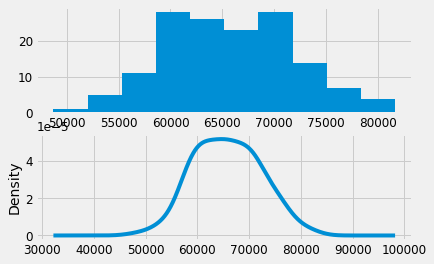

In [16]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
y.crimerate.hist()
pyplot.subplot(212)
y.crimerate.plot(kind='kde')
pyplot.show()

Box and Whisker Plots:

Median values across years confirms an upwards trend
Steady increase in the spread, or middle 50% of the data (boxes) over time
A model considering seasonality might work well

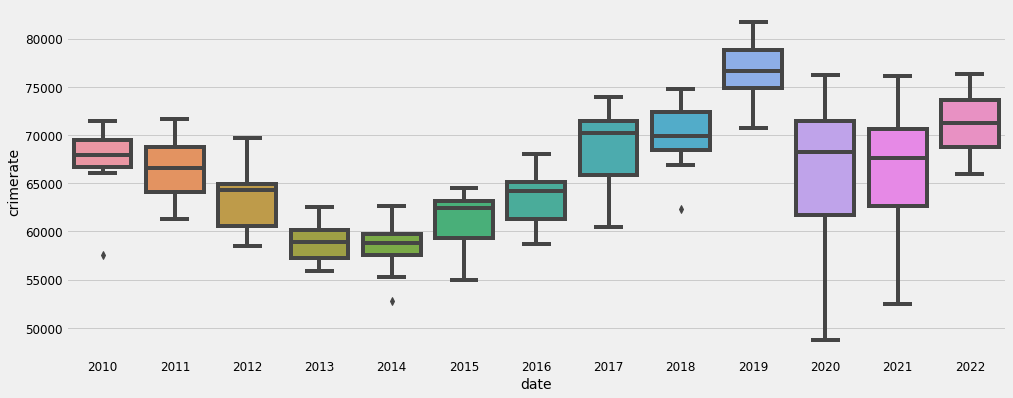

In [17]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(y.crimerate.index.year, y.crimerate, ax=ax)


**Decomposing using statsmodel:**
We can use statsmodels to perform a decomposition of this time series.
The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns.
With statsmodels we will be able to see the trend, seasonal, and residual components of our data.

```

```



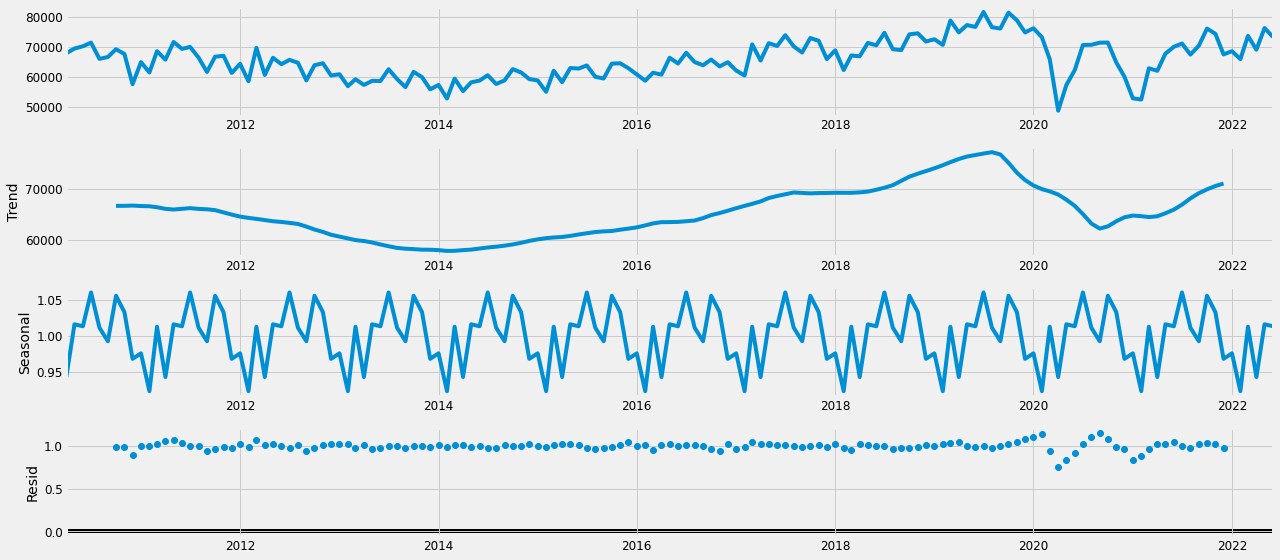

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomposition.plot()
plt.show()

**Stationarity**

A Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time.
Most of the Time Series models work on the assumption that the TS is stationary. Major reason for this is that there are many ways in which a series can be non-stationary, but only one way for stationarity.
Intuitively, we can say that if a Time Series has a particular behaviour over time, there is a very high probability that it will follow the same in the future.
Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

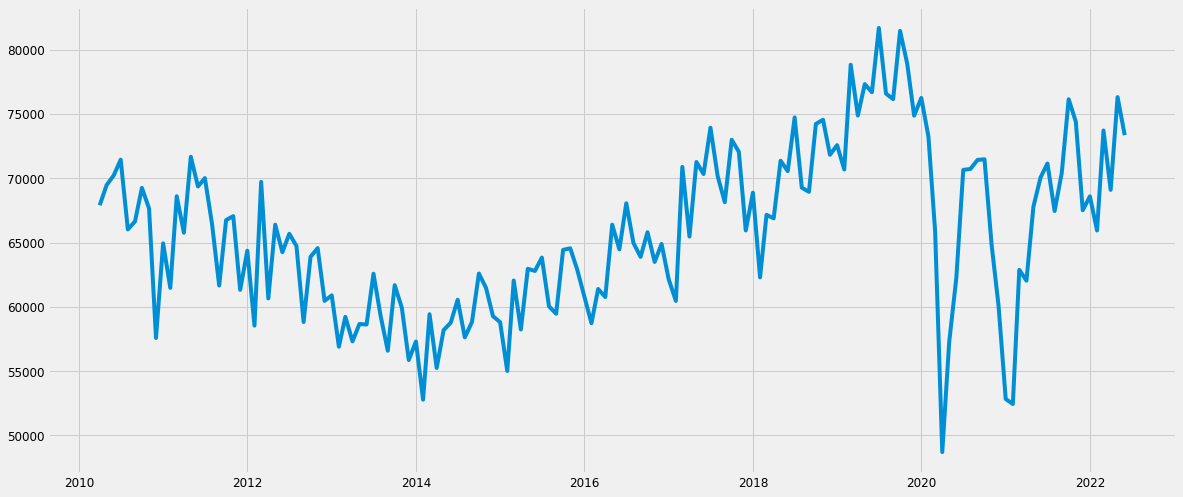

In [19]:
plt.plot(y)

**We can check stationarity using the following:**

**ACF and PACF plots:** If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.
**Plotting Rolling Statistics:** We can plot the moving average or moving variance and see if it varies with time. Moving average/variance is for any instant ‘t’, the average/variance of the last year, i.e. last 12 months.
**Augmented Dickey-Fuller Test**: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details.

**ACF and PACF plots**

Let's review the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots
If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.
This data is non-stationary as a high number of previous observations are correlated with future values.
Confidence intervals are drawn as a cone.
By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.
The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

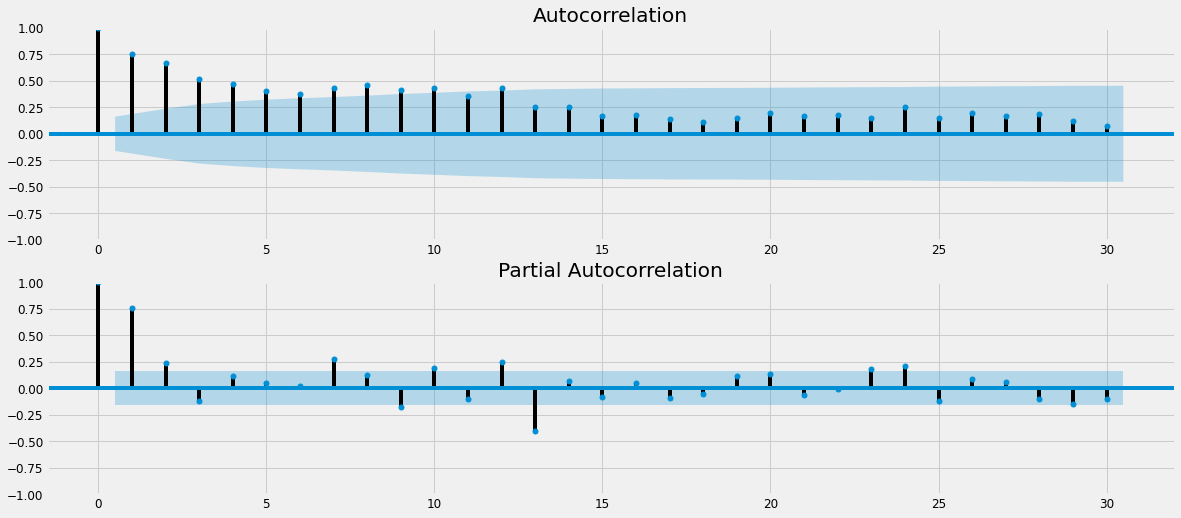

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pyplot.figure()
pyplot.subplot(211)
plot_acf(y.crimerate, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(y.crimerate, ax=pyplot.gca(), lags = 30)
pyplot.show()

# Plotting Rolling Statistics

We observe that the rolling mean and Standard deviation are not constant with respect to time (increasing trend)
The time series is hence not stationary

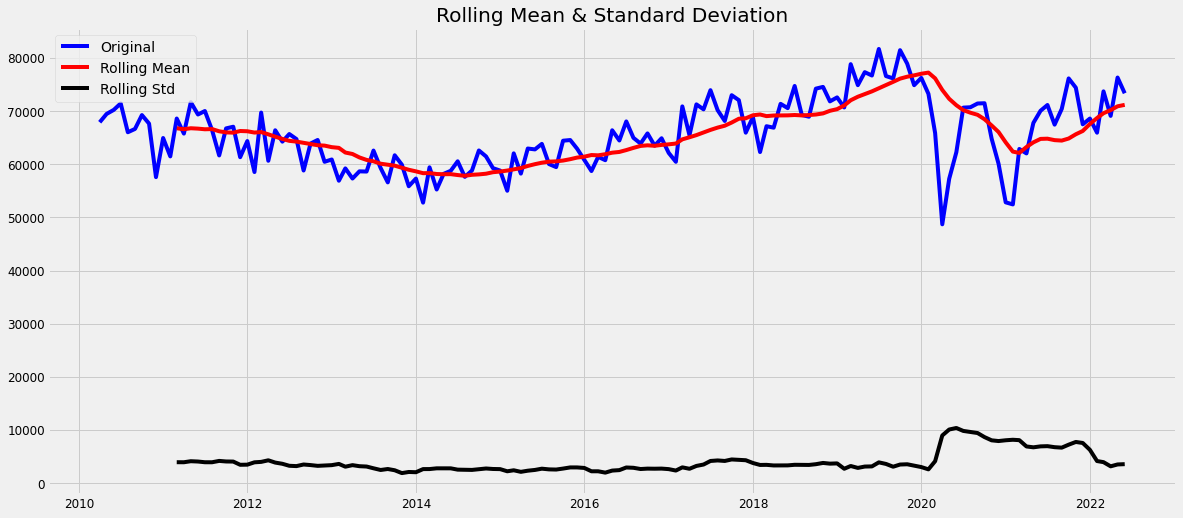

In [21]:
#Determing rolling statistics
rolmean =y.rolling(window=12).mean()
rolstd =y.rolling(12).std()

#Plot rolling statistics:
orig = plt.plot(y, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Augmented Dickey-Fuller Test

The intuition behind the test is that if the series is integrated then the lagged level of the series y(t-1) will provide no relevant information in predicting the change in y(t).
Null hypothesis: The time series is not stationary
Rejecting the null hypothesis (i.e. a very low p-value) will indicate staionarity

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(y.crimerate, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.809723
p-value                          0.375645
#Lags Used                      12.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64


In [24]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

# Making Time Series Stationary
There are 2 major reasons behind non-stationaruty of a TS:

**Trend** – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
**Seasonality** – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

# Transformations

We can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:

# Log Scale Transformation

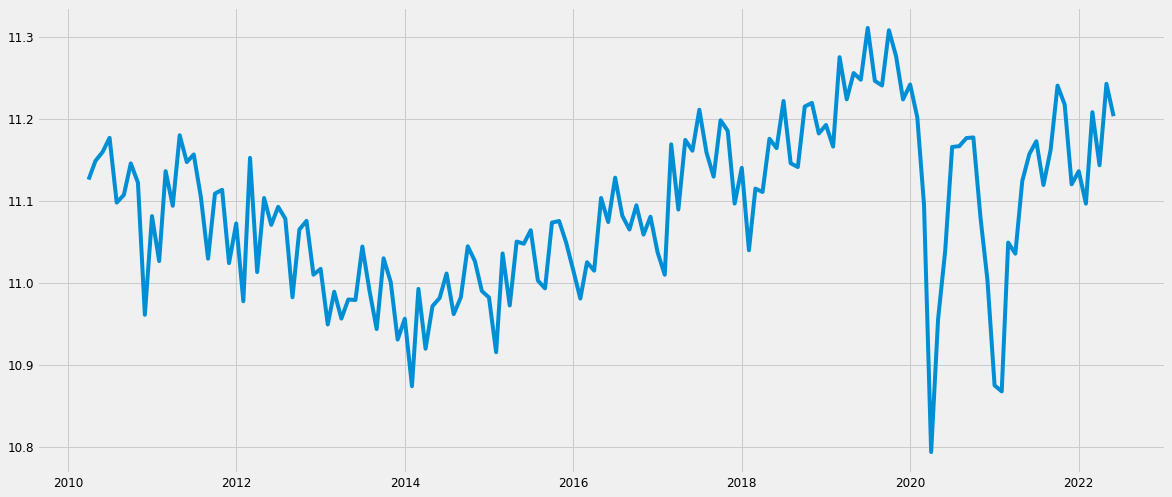

In [25]:
ts_log = np.log(y)
plt.plot(ts_log)

# Other possible transformations:
--Exponential tranformation
--Box Cox transformation
--Square root transformation

# Techniques to remove Trend - Smoothing


Smoothing is taking rolling averages over windows of time

# Moving Average


We take average of ‘k’ consecutive values depending on the frequency of time series.
Here we can take the average over the past 1 year, i.e. last 12 values.
A drawback in this particular approach is that the time-period has to be strictly defined.

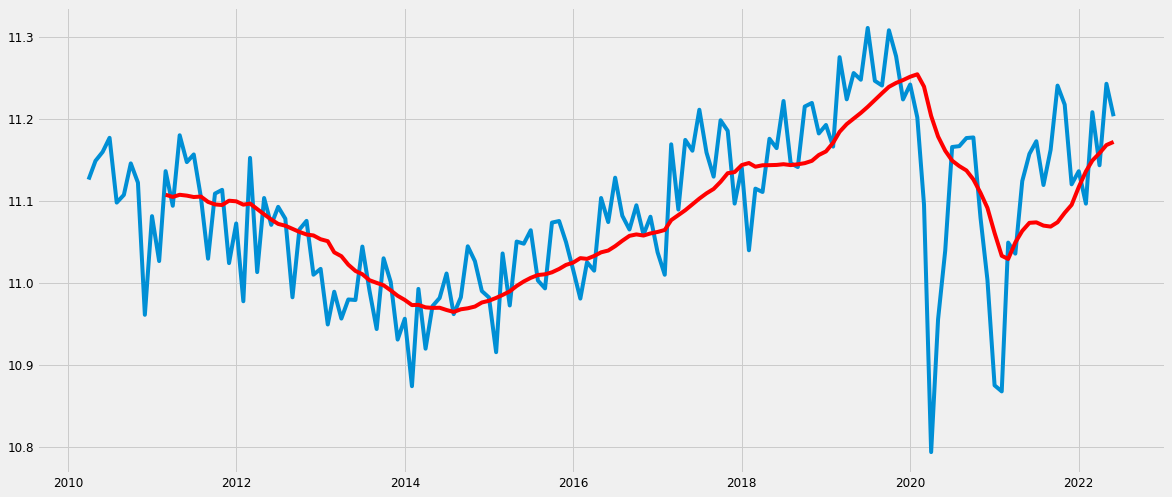

In [26]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [27]:
ts_log_moving_avg_diff = ts_log.crimerate  - moving_avg.crimerate
ts_log_moving_avg_diff.head(12)

date
2010-04-01         NaN
2010-05-01         NaN
2010-06-01         NaN
2010-07-01         NaN
2010-08-01         NaN
2010-09-01         NaN
2010-10-01         NaN
2010-11-01         NaN
2010-12-01         NaN
2011-01-01         NaN
2011-02-01         NaN
2011-03-01    0.028776
Name: crimerate, dtype: float64

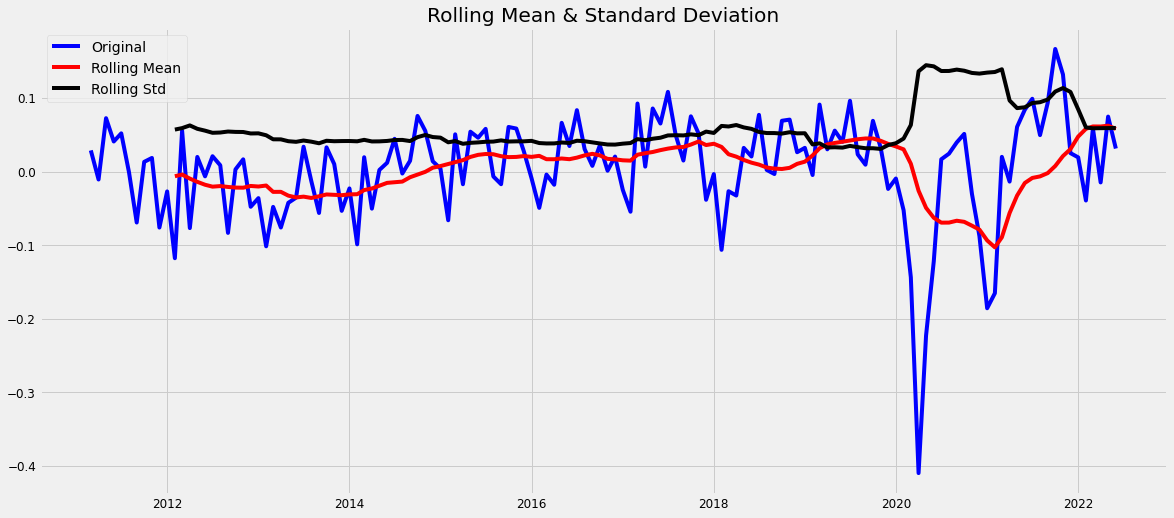

Results of Dickey-Fuller Test:
Test Statistic                  -3.070189
p-value                          0.028839
#Lags Used                      12.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


In [28]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

# Exponentially weighted moving average:


To overcome the problem of choosing a defined window in moving average, we can use exponential weighted moving average
We take a ‘weighted moving average’ where more recent values are given a higher weight.
There can be many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor. Exponential Moving Average function======ewma

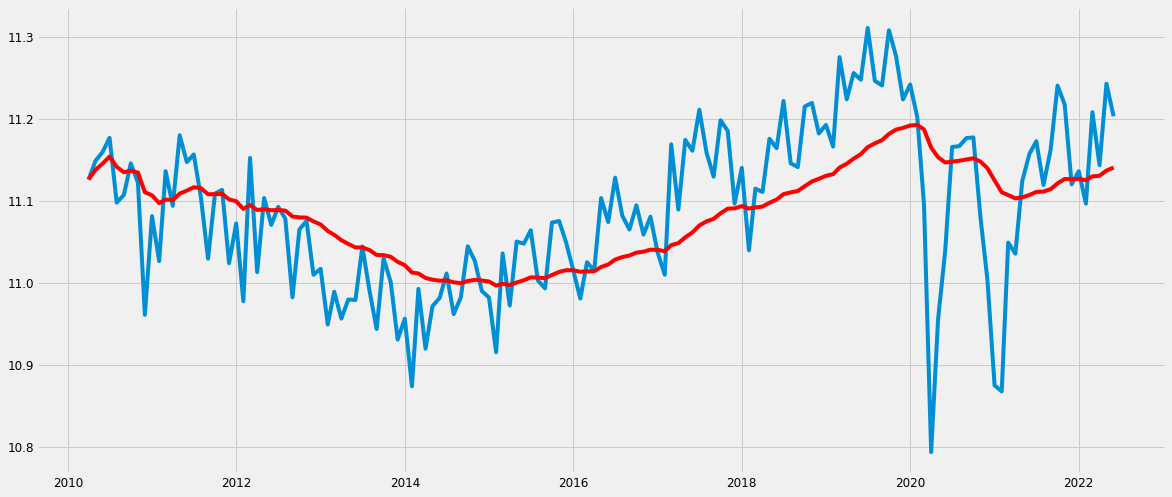

In [29]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

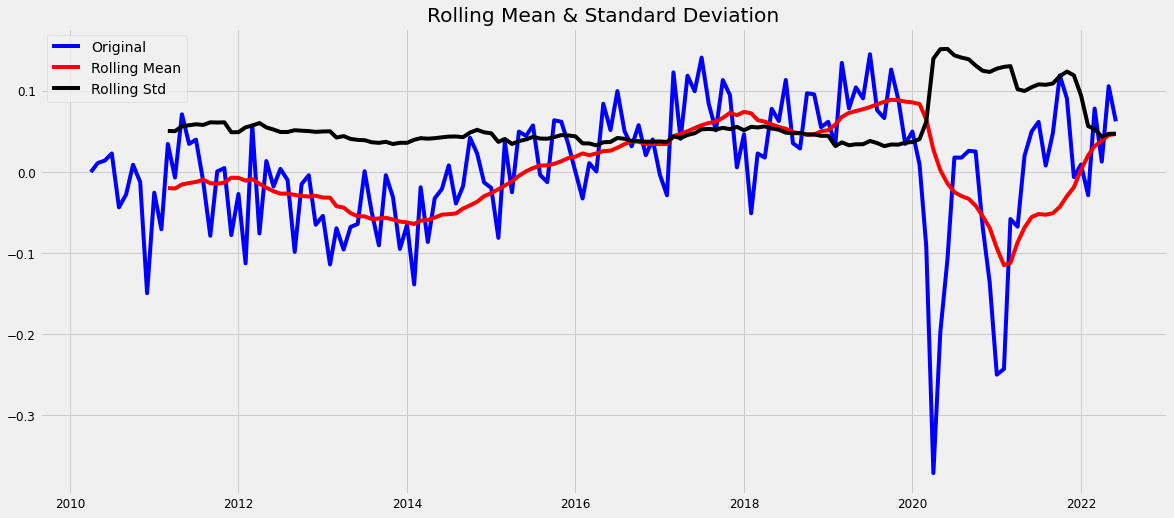

Results of Dickey-Fuller Test:
Test Statistic                  -2.383451
p-value                          0.146462
#Lags Used                      12.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64


In [30]:
ts_log_ewma_diff = ts_log.crimerate  - expwighted_avg.crimerate
test_stationarity(ts_log_ewma_diff)

# Further Techniques to remove Seasonality and Trend

The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality.



Differencing
In this technique, we take the difference of the observation at a particular instant with that at the previous instant.
First order differencing in Pandas

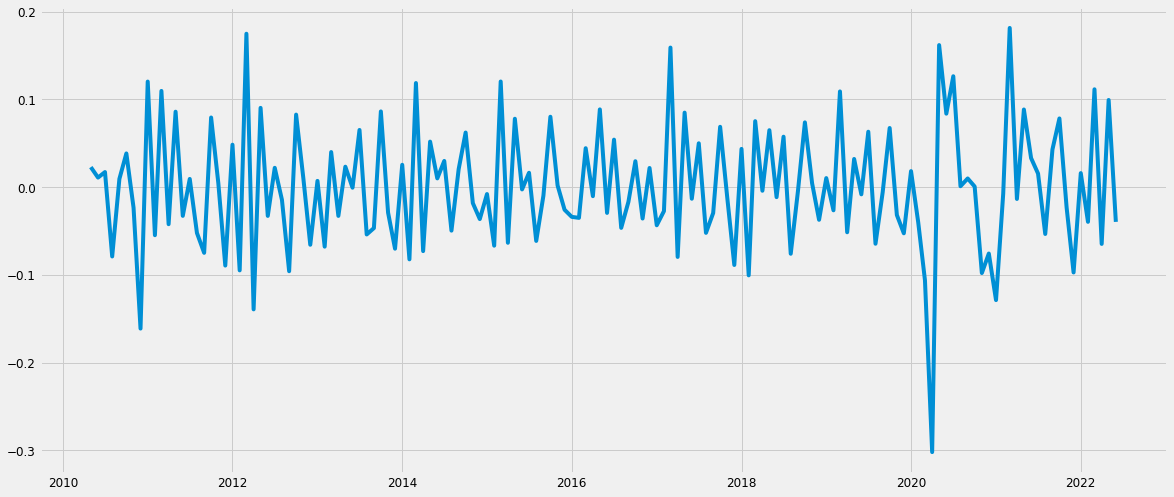

In [31]:
ts_log_diff = ts_log.crimerate - ts_log.crimerate.shift()
plt.plot(ts_log_diff)

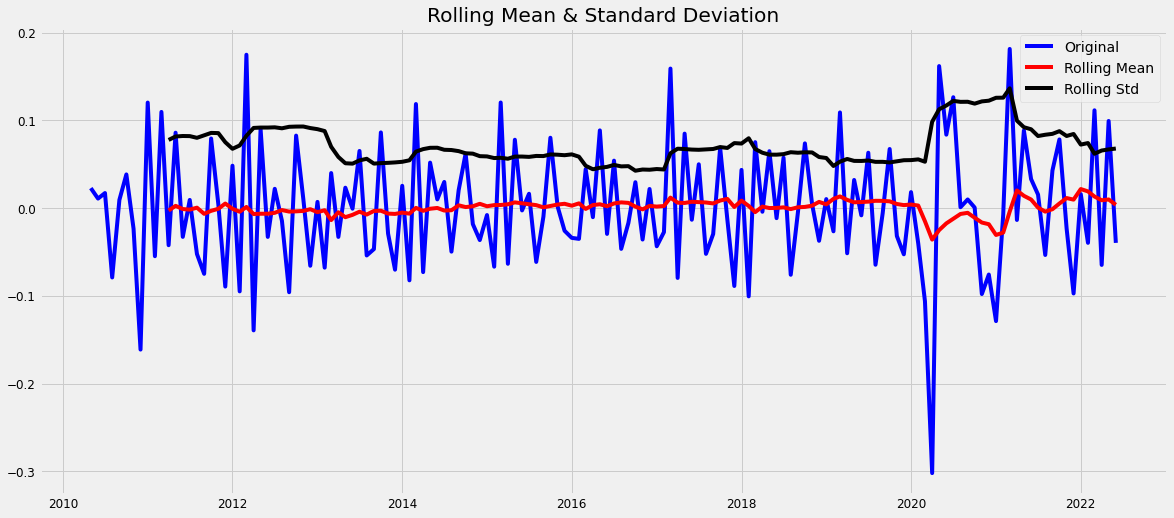

Results of Dickey-Fuller Test:
Test Statistic                  -3.443901
p-value                          0.009550
#Lags Used                      11.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64


In [32]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

**Decomposition**

In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned.

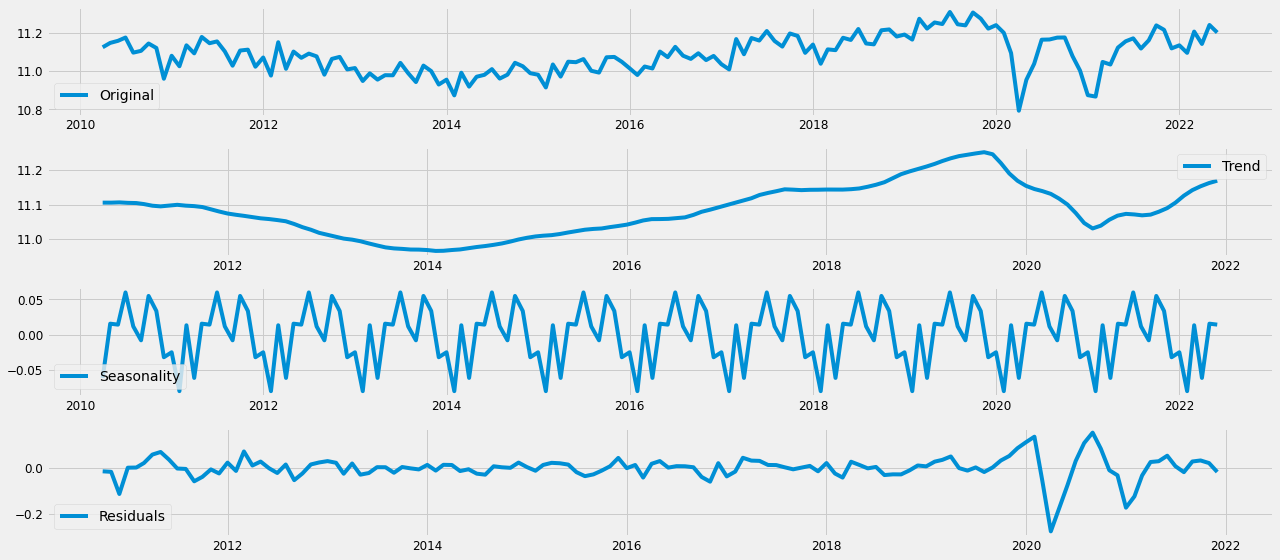

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

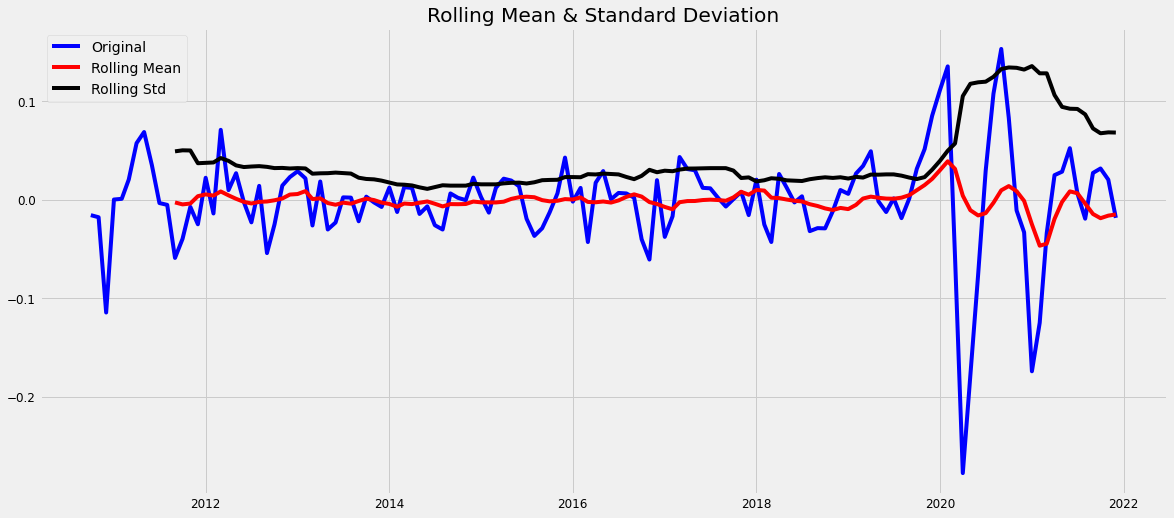

Results of Dickey-Fuller Test:
Test Statistic                -1.022788e+01
p-value                        5.119791e-18
#Lags Used                     3.000000e+00
Number of Observations Used    1.310000e+02
Critical Value (1%)           -3.481282e+00
Critical Value (5%)           -2.883868e+00
Critical Value (10%)          -2.578677e+00
dtype: float64


In [34]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

[link text](https://learn.co/lessons/dsc-time-series-decomposition)  
bu konuyla ılgılı yardımcı kaynak bulabılırsın  decompose

# Time Series forecasting

https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/#:~:text=5.%20Forecasting%20a,be%20two%20situations%3A 
BU KONUDAN YARDIM ALABILIRSIN RAPOR ICIN 

# Autoregression (AR)

The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.
Number of AR (Auto-Regressive) terms (p): p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

In [35]:
import statsmodels.api as sm

In [36]:
from statsmodels.tsa.arima.model import ARIMA
from random import random
model = ARIMA(ts_log_diff, order=(1,0,0))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


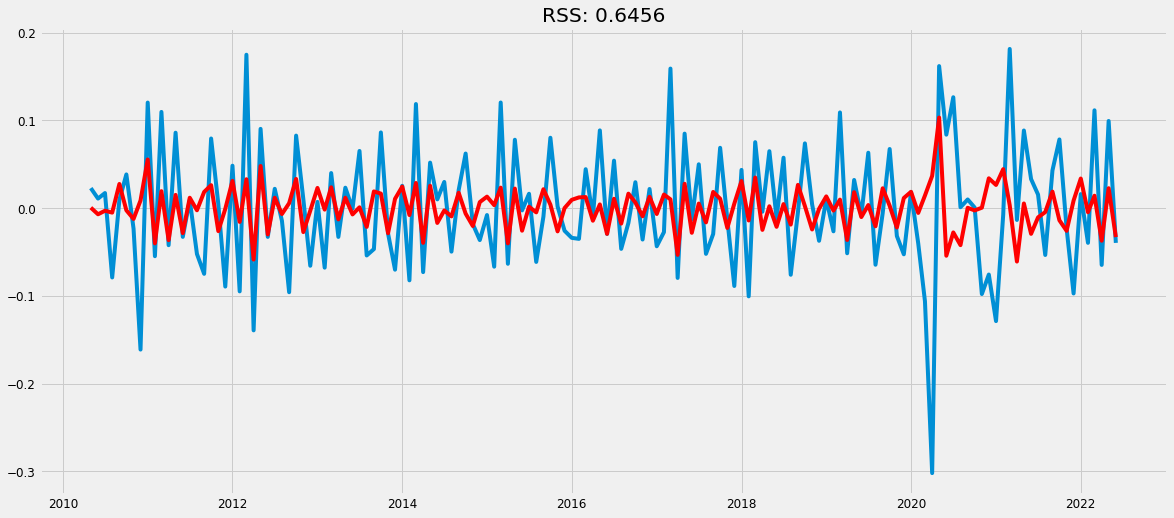

In [37]:
plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))
plt.show()



# Reversing the transformation 
Fitted or predicted values:

In [38]:
predictions_ARIMA_diff = pd.Series(model_fit.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

date
2010-05-01    0.000555
2010-06-01   -0.007002
2010-07-01   -0.002960
2010-08-01   -0.005094
2010-09-01    0.027571
dtype: float64


Cumulative Sum to reverse differencing:



In [39]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

date
2010-05-01    0.000555
2010-06-01   -0.006447
2010-07-01   -0.009407
2010-08-01   -0.014501
2010-09-01    0.013071
dtype: float64


# Adding 1st month value which was previously removed while differencing:



In [40]:
predictions_ARIMA_log = pd.Series(ts_log.crimerate.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
2010-04-01    11.125806
2010-05-01    11.126361
2010-06-01    11.119359
2010-07-01    11.116399
2010-08-01    11.111305
dtype: float64

Taking Exponent to reverse Log Transform:

In [41]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

Text(0.5, 1.0, 'RMSE: 10353.7591')

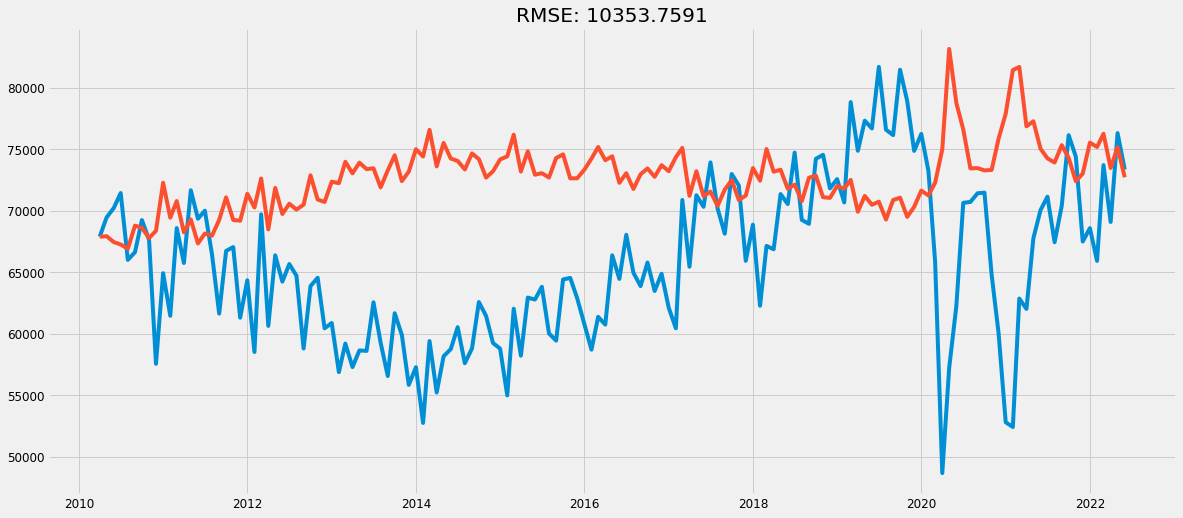

In [42]:
plt.plot(y.crimerate)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(np.nansum((predictions_ARIMA-y.crimerate)**2)/len(y.crimerate)))

**Forecast quality scoring metrics**
-R squared
-Mean Absolute Error
-Median Absolute Error
-Mean Squared Error
-Mean Squared Logarithmic Error
-Mean Absolute Percentage Error

In [43]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error


**R squared,** coefficient of determination (it can be interpreted as a percentage of variance explained by the model), (-inf, 1]

sklearn.metrics.r2_score

In [44]:
r2_score(y.crimerate, predictions_ARIMA)

-1.6027465058513664

[link text](https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative#:~:text=193-,R,trend%20of%20the%20data%2C%20so%20fits%20worse%20than%20a%20horizontal%20line.,-Example%3A%20fit) 
R2 degerın neden negatif oldugunu acıklıyor yanı  mamntıken dıger tıme serıes analızler ıcn bu deegerı karsılastırabılırız ve analız edebılrız 

**Mean Absolute Error,** it is an interpretable metric because it has the same unit of measurement as the initial series, [0, +inf)

sklearn.metrics.mean_absolute_error

In [45]:
mean_absolute_error(y.crimerate, predictions_ARIMA)

8356.28402409781

**Median Absolute Error**, again an interpretable metric, particularly interesting because it is robust to outliers, [0, +inf)

sklearn.metrics.median_absolute_error

In [46]:
median_absolute_error(y.crimerate, predictions_ARIMA)

7345.314692868778

**Mean Squared Error,** most commonly used, gives higher penalty to big mistakes and vise versa, [0, +inf)

sklearn.metrics.mean_squared_error

In [47]:
mean_squared_error(y.crimerate, predictions_ARIMA)

107200327.26250681

**Mean Squared Logarithmic Error**, practically the same as MSE but we initially take logarithm of the series, as a result we give attention to small mistakes as well, usually is used when data has exponential trends, [0, +inf)

sklearn.metrics.mean_squared_log_error

In [48]:
mean_squared_log_error(y.crimerate, predictions_ARIMA)

0.02412677168047193

**Mean Absolute Percentage Error,** same as MAE but percentage, — very convenient when you want to explain the quality of the model to your management, [0, +inf),

not implemented in sklearn

In [49]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [50]:
mean_absolute_percentage_error(y.crimerate, predictions_ARIMA)


13.597696008881496

**Function to evaluate forecast using above metrics:**


In [51]:
def evaluate_forecast(y,pred):
    results = pd.DataFrame({'r2_score':r2_score(y, pred),
                           }, index=[0])
    results['mean_absolute_error'] = mean_absolute_error(y, pred)
    results['median_absolute_error'] = median_absolute_error(y, pred)
    results['mse'] = mean_squared_error(y, pred)
    results['msle'] = mean_squared_log_error(y, pred)
    results['mape'] = mean_absolute_percentage_error(y, pred)
    results['rmse'] = np.sqrt(results['mse'])
    return results

In [52]:
evaluate_forecast(y.crimerate, predictions_ARIMA)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,-1.602747,8356.284024,7345.314693,1.072003e+08,0.024127,13.597696,10353.759088


RMSE has the benefit of penalizing large errors more so can be more appropriate in some cases, for example, if being off by 10 is more than twice as bad as being off by 5. But if being off by 10 is just twice as bad as being off by 5, then MAE is more appropriate.

From an interpretation standpoint, MAE is clearly the winner. RMSE does not describe average error alone and has other implications that are more difficult to tease out and understand.

On the other hand, one distinct advantage of RMSE over MAE is that RMSE avoids the use of taking the absolute value, which is undesirable in many mathematical calculations  
https://stats.stackexchange.com/questions/56302/what-are-good-rmse-values#:~:text=22,out%20of%20sample.

# Moving Average (MA)

Number of MA (Moving Average) terms (q): q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

In [53]:
# MA example

from statsmodels.tsa.arima.model import ARIMA
from random import random
# fit model
model = ARIMA(ts_log_diff, order=(0,1,0))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [54]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              crimerate   No. Observations:                  146
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 106.383
Date:                Mon, 08 Aug 2022   AIC                           -210.766
Time:                        16:43:01   BIC                           -207.789
Sample:                    05-01-2010   HQIC                          -209.556
                         - 06-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0135      0.001     10.170      0.000       0.011       0.016
===================================================================================
Ljung-Box (L1) (Q):                  68.84   Jarque-Bera (JB):                10.40
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               0.86   Skew:                             0.50
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'RSS: 1.9577')

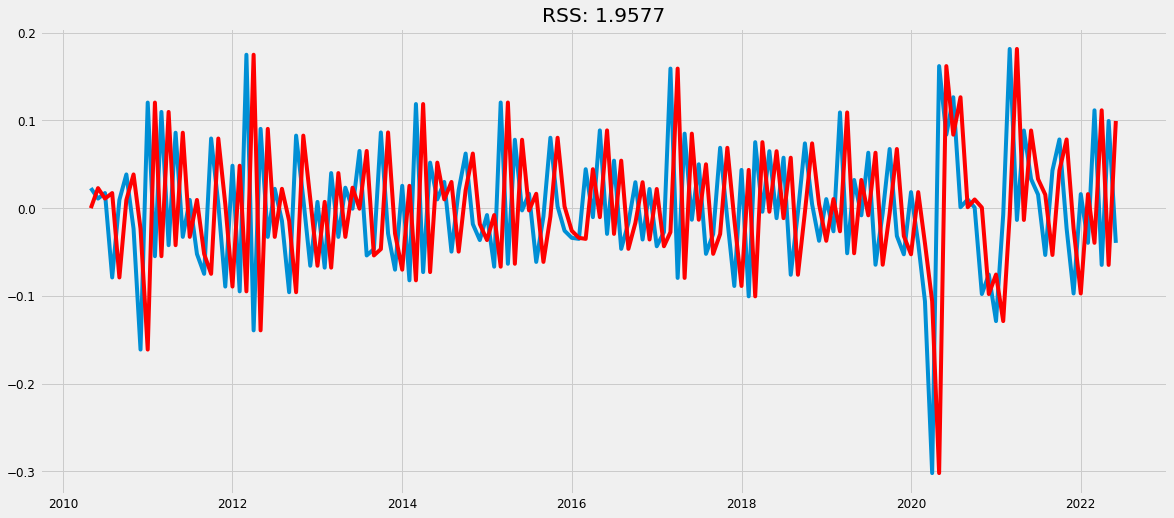

In [55]:
plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))

**Autoregressive Moving Average (ARMA)**
*Number of AR (Auto-Regressive) terms **bold text** (p): p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
*Number of MA (Moving Average) terms (q):* q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

-----AR, MA and ARMA models in Statsmodels
To explore AR and ARMA models, we will use sm.tsa.ARMA. Remember, an ARMA model is a combination of autoregressive and moving average models.

We can train an autoregressive model by turning off the moving average component (setting q = 0).

By passing the (1, 0) in the second argument, we are fitting an ARMA model as ARMA(p=1, q=1). Remember, an ARMA(p, q) model is AR(p) + MA(q). This means that an ARMA(1, 0) is the same as an AR(1) model.

In this AR(1) model we learn an intercept value, or base sales values. Additionally, we learn a coefficient that tells us how to include the last sales values. In this case, we take the intercept of ~4700 and add in the previous months sales * 0.68.

Note the coefficient here does not match the lag 1 autocorrelation - implying the the data is not stationary.

We can learn an AR(2) model, which regresses each sales value on the last two, with the following:

In [56]:
# ARMA example

from statsmodels.tsa.arima.model import ARIMA
from random import random
# fit model
model = ARIMA(ts_log_diff, order=(1,1,0))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [57]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              crimerate   No. Observations:                  146
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 152.055
Date:                Mon, 08 Aug 2022   AIC                           -300.110
Time:                        16:43:02   BIC                           -294.156
Sample:                    05-01-2010   HQIC                          -297.691
                         - 06-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6841      0.045    -15.067      0.000      -0.773      -0.595
sigma2         0.0072      0.001     11.660      0.000       0.006       0.008
===================================================================================
Ljung-Box (L1) (Q):                   4.74   Jarque-Bera (JB):                33.25
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                             0.77
Prob(H) (two-sided):                  0.10   Kurtosis:                         4.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'RSS: 1.0385')

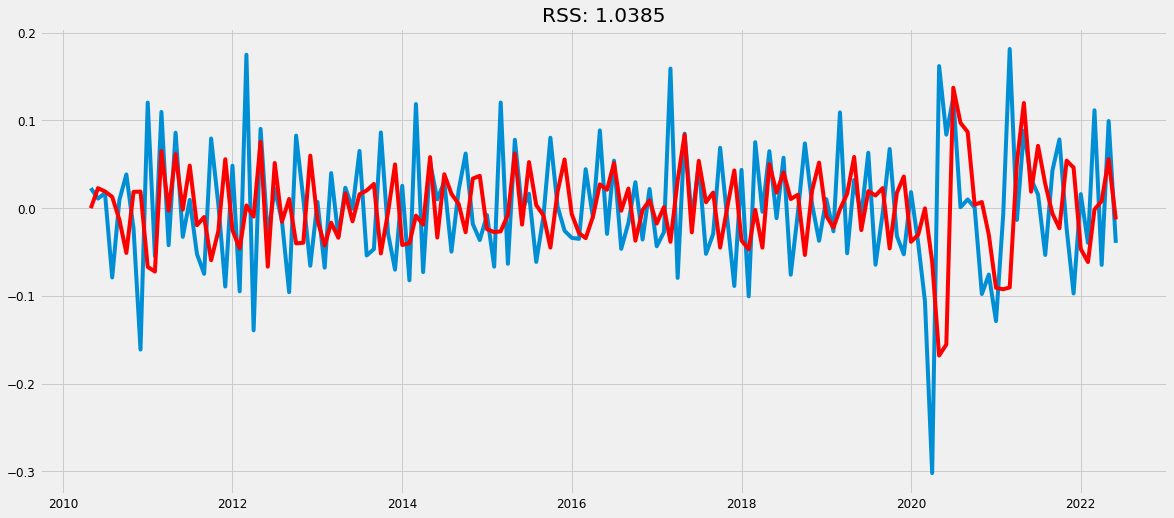

In [58]:
plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))

# Autoregressive Integrated Moving Average (ARIMA)
In an ARIMA model there are 3 parameters that are used to help model the major aspects of a times series: seasonality, trend, and noise. These parameters are labeled p,d,and q.

**Number of AR (Auto-Regressive) terms (p):** p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
**Number of Differences (d)**: d is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series.
**Number of MA (Moving Average) terms (q): **q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

# Observations from EDA on the time series:

Non stationarity implies at least one level of differencing (d) is required in ARIMA
The next step is to select the lag values for the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively, using PACF, ACF plots
Tuning ARIMA parameters

Note: A problem with ARIMA is that it does not support **seasonal data.** That is a time series with a repeating cycle. ARIMA expects data that is either not seasonal or has the seasonal component removed, e.g. seasonally adjusted via methods such as seasonal differencing.

In [59]:
ts = y.crimerate - y.crimerate.shift()
ts.dropna(inplace=True)

**ACF and PACF plots after differencing:**

Confidence intervals are drawn as a cone.
By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.
AR(1) process -- has ACF tailing out and PACF cutting off at lag=1
AR(2) process -- has ACF tailing out and PACF cutting off at lag=2
MA(1) process -- has ACF cut off at lag=1
MA(2) process -- has ACF cut off at lag=2

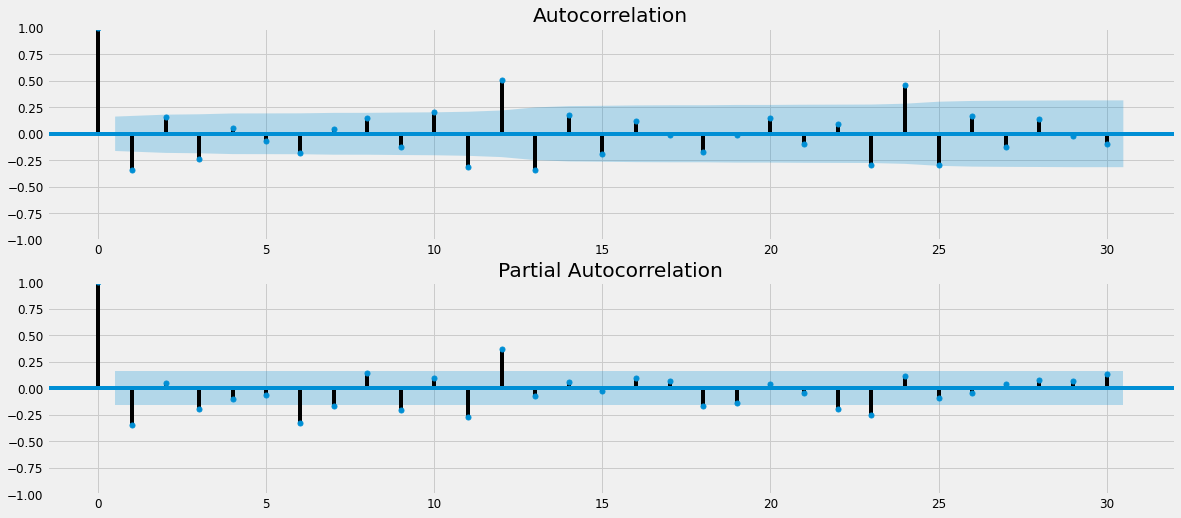

In [60]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts, ax=pyplot.gca(),lags=30)
pyplot.subplot(212)
plot_pacf(ts, ax=pyplot.gca(),lags=30)
pyplot.show()

**Interpreting ACF plots**

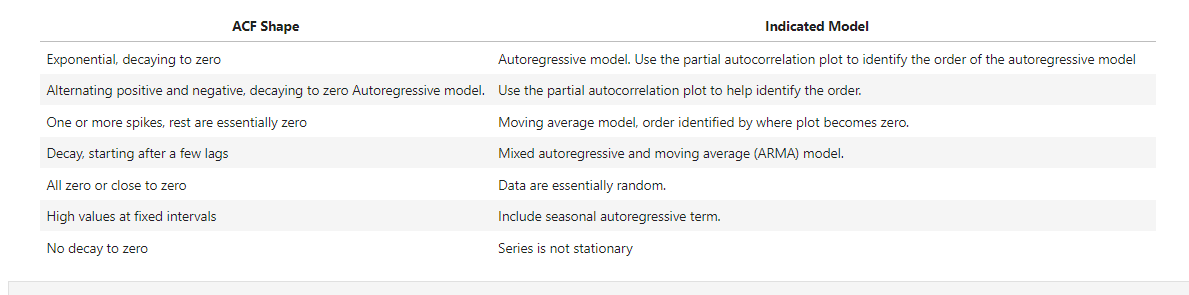


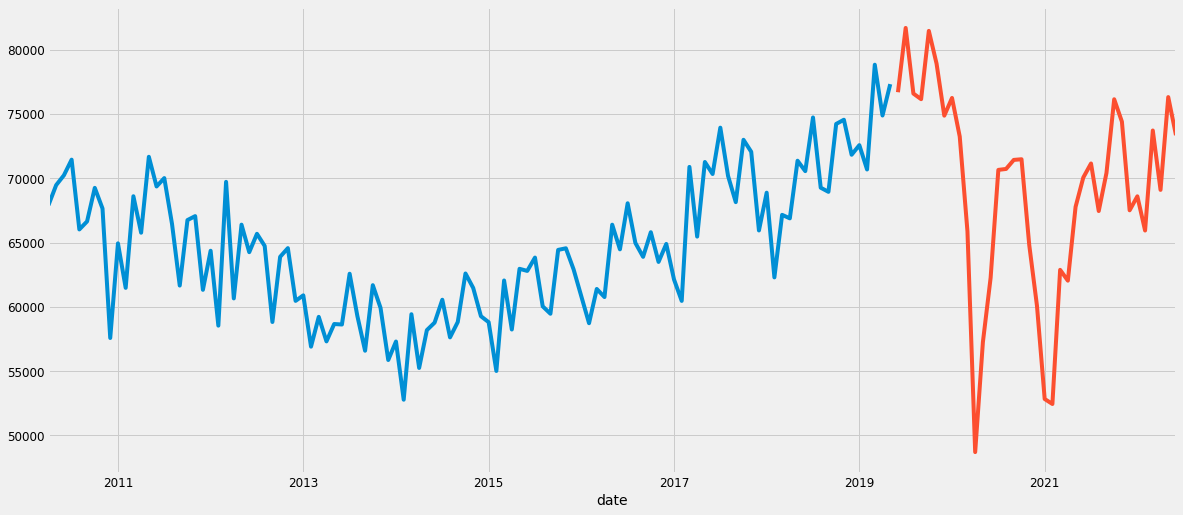

In [61]:
#divide into train and validation set
train = y[:int(0.75*(len(y)))]
valid = y[int(0.75*(len(y))):]

#plotting the data
train['crimerate'].plot()
valid['crimerate'].plot()

In [62]:
# ARIMA example
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# fit model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [63]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              crimerate   No. Observations:                  110
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1057.568
Date:                Mon, 08 Aug 2022   AIC                           2121.136
Time:                        16:43:03   BIC                           2129.210
Sample:                    04-01-2010   HQIC                          2124.410
                         - 05-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4042      0.318     -1.271      0.204      -1.028       0.219
ma.L1          0.2601      0.329      0.792      0.429      -0.384       0.904
sigma2      1.119e+07   7.79e-09   1.44e+15      0.000    1.12e+07    1.12e+07
===================================================================================
Ljung-Box (L1) (Q):                  19.90   Jarque-Bera (JB):                 1.96
Prob(Q):                              0.00   Prob(JB):                         0.38
Heteroskedasticity (H):               0.64   Skew:                             0.31
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.25e+32. Standard errors may be unstable.
"""

In [64]:
start_index = valid.index.min()
end_index = valid.index.max()

#Predictions
predictions = model_fit.predict(start=start_index, end=end_index)

In [65]:
# report performance
mse = mean_squared_error(y[start_index:end_index], predictions)
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))

RMSE: 10918.825660309618, MSE:119220753.80023575


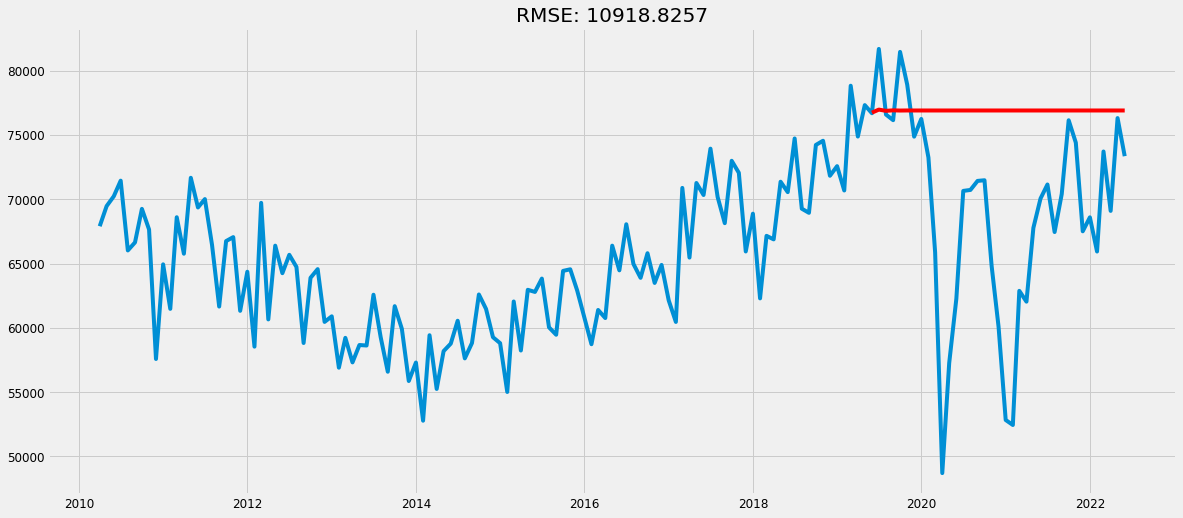

In [66]:
plt.plot(y.crimerate)
plt.plot(predictions, color='red')
plt.title('RMSE: %.4f'% rmse)
plt.show()

# Fitted or predicted values:

In [67]:
predictions_ARIMA_diff = pd.Series(predictions, copy=True)
print (predictions_ARIMA_diff.head())

2019-06-01    76738.638744
2019-07-01    76975.256534
2019-08-01    76879.609653
2019-09-01    76918.272535
2019-10-01    76902.644023
Freq: MS, Name: predicted_mean, dtype: float64


# Cumulative Sum to reverse differencing:

In [68]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

2019-06-01     76738.638744
2019-07-01    153713.895278
2019-08-01    230593.504931
2019-09-01    307511.777466
2019-10-01    384414.421489
Freq: MS, Name: predicted_mean, dtype: float64


# Adding 1st month value which was previously removed while differencing:

In [69]:
predictions_ARIMA_log = pd.Series(valid.crimerate.iloc[0], index=valid.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
2019-06-01    153432.638744
2019-07-01    230407.895278
2019-08-01    307287.504931
2019-09-01    384205.777466
2019-10-01    461108.421489
dtype: float64

# Taking Exponent to reverse Log Transform:

Text(0.5, 1.0, 'RMSE: 877523.2828')

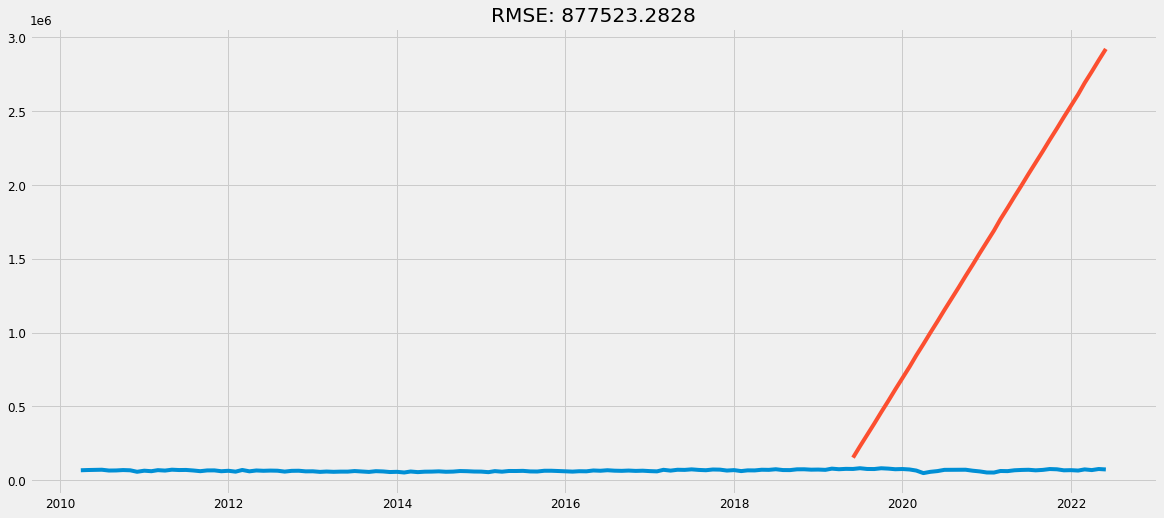

In [70]:
plt.plot(y.crimerate)
plt.plot(predictions_ARIMA_log)
plt.title('RMSE: %.4f'% np.sqrt(np.nansum((predictions_ARIMA_log-ts)**2)/len(ts)))

In [71]:
evaluate_forecast(y[start_index:end_index], predictions_ARIMA_log)


,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,-47079.12726,1.468587e+06,1.477724e+06,2.833286e+12,9.000906,NaN,1.683237e+06


# Auto ARIMA


In [72]:
#building the model
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2129.397, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2123.970, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2121.616, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2120.429, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2122.025, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2123.005, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2124.735, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2129.351, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2118.692, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2121.136, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2116.735, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2127.295, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=2128.314, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=2129.535, Time=0.14 sec

Best model:  ARIMA(0,1,2)(0,0,0)

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

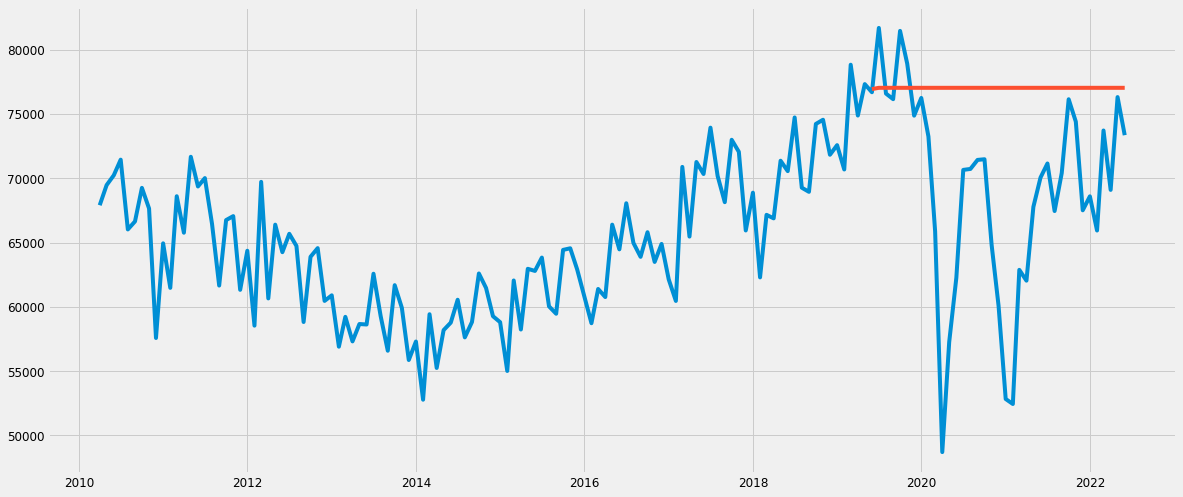

In [73]:
forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(y.crimerate, label='Train')
#plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [74]:
evaluate_forecast(valid, forecast)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,-1.014736,8404.73006,6385.820277,1.212470e+08,0.027178,NaN,11011.220334


# Seasonal Autoregressive Integrated Moving-Average (SARIMA)

Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

**Trend Elements:**

There are three trend elements that require configuration. They are the same as the ARIMA model, specifically:

p: Trend autoregression order.
d: Trend difference order.
q: Trend moving average order.

**Seasonal Elements:**

There are four seasonal elements that are not part of ARIMA that must be configured; they are:

P: Seasonal autoregressive order.
D: Seasonal difference order.
Q: Seasonal moving average order.
m: The number of time steps for a single seasonal period. For example, an S of 12 for monthly data suggests a yearly seasonal cycle.

**SARIMA notation:** SARIMA(p,d,q)(P,D,Q,m)

In [75]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(train, order=(3, 1, 3), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [76]:
start_index = valid.index.min()
end_index = valid.index.max()

#Predictions
predictions = model_fit.predict(start=start_index, end=end_index)

In [77]:
# report performance
mse = mean_squared_error(y[start_index:end_index], predictions)
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))

RMSE: 18453.858230106922, MSE:340544883.5768849


Text(0.5, 1.0, 'RMSE: 18453.8582')

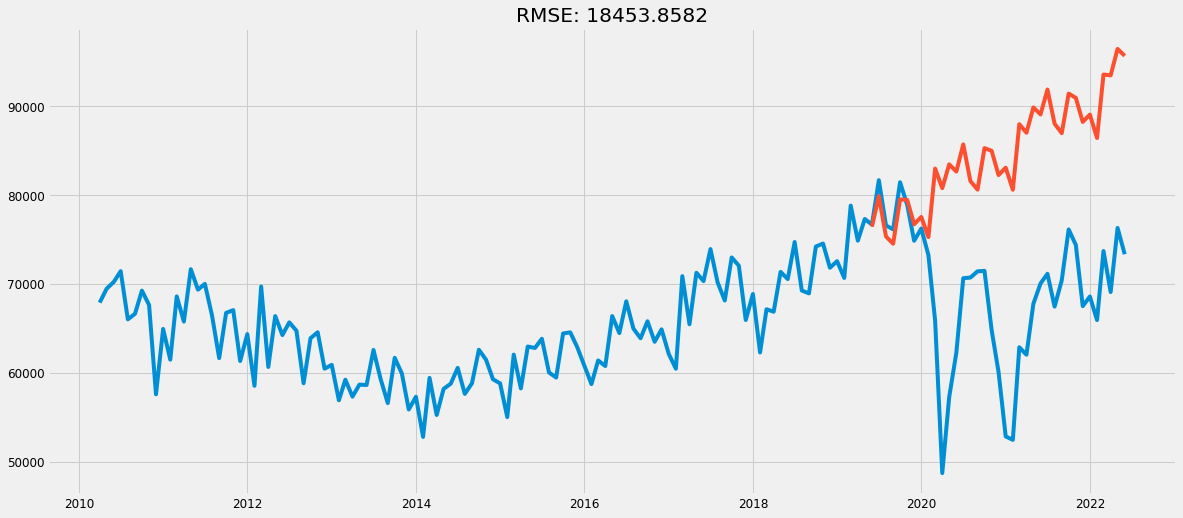

In [78]:
plt.plot(y)
plt.plot(predictions)
plt.title('RMSE: %.4f'% rmse)

In [79]:
evaluate_forecast(y[start_index:end_index], predictions)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,-4.658763,15891.215869,19885.04177,3.405449e+08,0.062461,NaN,18453.85823


# Auto - SARIMA
auto_arima documentation for selecting best model
[link text](https://alkaline-ml.com/pmdarima/tips_and_tricks.html)

In [80]:
#building the model
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=True, m=6, stepwise=True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[6] intercept   : AIC=2130.877, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[6] intercept   : AIC=2123.970, Time=0.23 sec
 ARIMA(1,1,0)(1,0,0)[6] intercept   : AIC=2123.473, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[6] intercept   : AIC=2122.314, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[6]             : AIC=2122.025, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[6] intercept   : AIC=2125.909, Time=0.05 sec
 ARIMA(0,1,0)(0,0,1)[6] intercept   : AIC=2125.924, Time=0.04 sec
 ARIMA(0,1,0)(1,0,1)[6] intercept   : AIC=2124.940, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[6] intercept   : AIC=2121.616, Time=0.04 sec
 ARIMA(1,1,0)(0,0,1)[6] intercept   : AIC=2123.504, Time=0.09 sec
 ARIMA(1,1,0)(1,0,1)[6] intercept   : AIC=2122.142, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[6] intercept   : AIC=2122.737, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[6] intercept   : AIC=2123.005, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[6] intercept   : AIC=2120.429, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[6] intercept

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 0, 1, 6),
      suppress_warnings=True, with_intercept=False)

In [81]:
start_index = valid.index.min()
end_index = valid.index.max()

#Predictions
pred = model.predict()

In [82]:
pred = model.predict(n_periods=len(valid))
pred = pd.DataFrame(pred,index = valid.index,columns=['Prediction'])

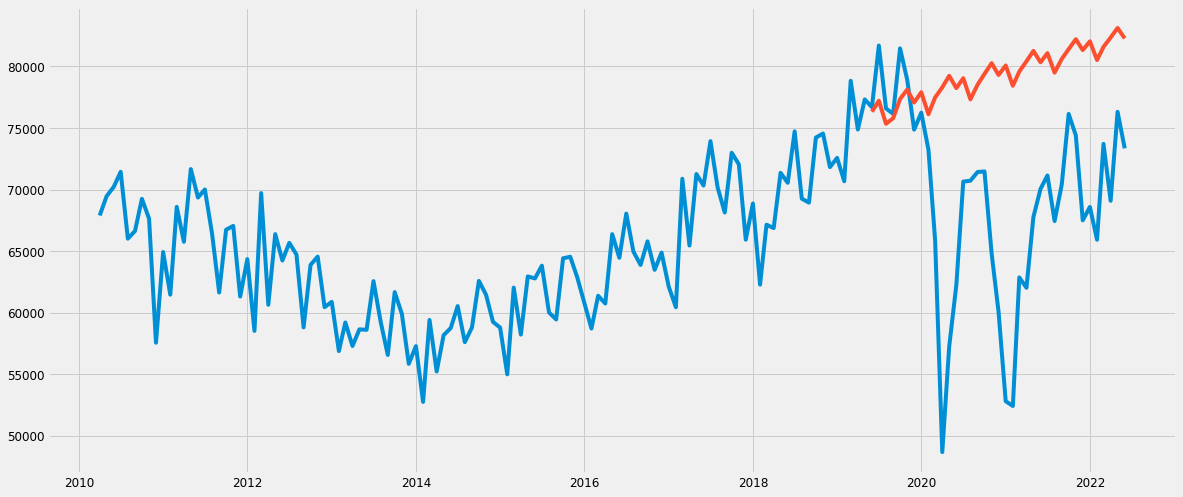

In [83]:
forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(y.crimerate, label='Train')
#plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [84]:
evaluate_forecast(y[start_index:end_index], forecast)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,-1.851125,10757.128717,9928.335782,1.715810e+08,0.036134,NaN,13098.891496


# Tuned SARIMA

In [85]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 6)
SARIMAX: (0, 0, 1) x (0, 1, 0, 6)
SARIMAX: (0, 1, 0) x (0, 1, 1, 6)
SARIMAX: (0, 1, 0) x (1, 0, 0, 6)


In [86]:
min_aic = 999999999
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            #Check for best model with lowest AIC
            if results.aic < min_aic:
                min_aic = results.aic
                min_aic_model = results
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 6)12 - AIC:2726.6888229788947
ARIMA(0, 0, 0)x(0, 0, 1, 6)12 - AIC:2510.2026483816035
ARIMA(0, 0, 0)x(0, 1, 0, 6)12 - AIC:2052.1873565211063
ARIMA(0, 0, 0)x(0, 1, 1, 6)12 - AIC:1913.6878473245122


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

ARIMA(0, 0, 0)x(1, 0, 0, 6)12 - AIC:2073.0385550619144
ARIMA(0, 0, 0)x(1, 0, 1, 6)12 - AIC:2038.7192690684894
ARIMA(0, 0, 0)x(1, 1, 0, 6)12 - AIC:1890.0534677324854
ARIMA(0, 0, 0)x(1, 1, 1, 6)12 - AIC:1871.5306561844684
ARIMA(0, 0, 1)x(0, 0, 0, 6)12 - AIC:2628.8146208392695
ARIMA(0, 0, 1)x(0, 0, 1, 6)12 - AIC:2466.13348710223


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

ARIMA(0, 0, 1)x(0, 1, 0, 6)12 - AIC:2030.5137007392923
ARIMA(0, 0, 1)x(0, 1, 1, 6)12 - AIC:1885.5827338747745
ARIMA(0, 0, 1)x(1, 0, 0, 6)12 - AIC:2501.772854166564
ARIMA(0, 0, 1)x(1, 0, 1, 6)12 - AIC:2455.6807461905964


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

ARIMA(0, 0, 1)x(1, 1, 0, 6)12 - AIC:1900.7529951238062
ARIMA(0, 0, 1)x(1, 1, 1, 6)12 - AIC:1854.6409770984728
ARIMA(0, 1, 0)x(0, 0, 0, 6)12 - AIC:2103.4328815797853
ARIMA(0, 1, 0)x(0, 0, 1, 6)12 - AIC:1991.605923387135
ARIMA(0, 1, 0)x(0, 1, 0, 6)12 - AIC:2072.2000611336935


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

ARIMA(0, 1, 0)x(0, 1, 1, 6)12 - AIC:1892.0981158116815
ARIMA(0, 1, 0)x(1, 0, 0, 6)12 - AIC:2008.757567704541
ARIMA(0, 1, 0)x(1, 0, 1, 6)12 - AIC:1988.1703230951744
ARIMA(0, 1, 0)x(1, 1, 0, 6)12 - AIC:1824.2263338726602


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

ARIMA(0, 1, 0)x(1, 1, 1, 6)12 - AIC:1803.1590411246175
ARIMA(0, 1, 1)x(0, 0, 0, 6)12 - AIC:2044.828020910736
ARIMA(0, 1, 1)x(0, 0, 1, 6)12 - AIC:1925.519517181698
ARIMA(0, 1, 1)x(0, 1, 0, 6)12 - AIC:2016.2677151436312


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

ARIMA(0, 1, 1)x(0, 1, 1, 6)12 - AIC:1841.250934206188
ARIMA(0, 1, 1)x(1, 0, 0, 6)12 - AIC:1966.7334343965053
ARIMA(0, 1, 1)x(1, 0, 1, 6)12 - AIC:1921.3039864239233


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

ARIMA(0, 1, 1)x(1, 1, 0, 6)12 - AIC:1808.641716039015


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 1, 1, 6)12 - AIC:1764.069743970203
ARIMA(1, 0, 0)x(0, 0, 0, 6)12 - AIC:2124.014336431008


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 6)12 - AIC:2014.013501622208
ARIMA(1, 0, 0)x(0, 1, 0, 6)12 - AIC:2046.6868637861162
ARIMA(1, 0, 0)x(0, 1, 1, 6)12 - AIC:1902.2238020471464
ARIMA(1, 0, 0)x(1, 0, 0, 6)12 - AIC:2010.7664809813077


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

ARIMA(1, 0, 0)x(1, 0, 1, 6)12 - AIC:2011.1416586484197
ARIMA(1, 0, 0)x(1, 1, 0, 6)12 - AIC:1812.1006285065805
ARIMA(1, 0, 0)x(1, 1, 1, 6)12 - AIC:1863.5126105479285


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

ARIMA(1, 0, 1)x(0, 0, 0, 6)12 - AIC:2065.150670510134


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 0, 1, 6)12 - AIC:2167.480504815192
ARIMA(1, 0, 1)x(0, 1, 0, 6)12 - AIC:2028.6412258168998
ARIMA(1, 0, 1)x(0, 1, 1, 6)12 - AIC:1869.0994043921396
ARIMA(1, 0, 1)x(1, 0, 0, 6)12 - AIC:2078.0651568640183


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

ARIMA(1, 0, 1)x(1, 0, 1, 6)12 - AIC:2018.4216011290885
ARIMA(1, 0, 1)x(1, 1, 0, 6)12 - AIC:1805.3403542371982


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 1, 6)12 - AIC:1784.1689625657032
ARIMA(1, 1, 0)x(0, 0, 0, 6)12 - AIC:2064.3492471445306
ARIMA(1, 1, 0)x(0, 0, 1, 6)12 - AIC:1951.6322899635943
ARIMA(1, 1, 0)x(0, 1, 0, 6)12 - AIC:2043.0553902308416
ARIMA(1, 1, 0)x(0, 1, 1, 6)12 - AIC:1880.2481332798768
ARIMA(1, 1, 0)x(1, 0, 0, 6)12 - AIC:1948.2619615712329


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

ARIMA(1, 1, 0)x(1, 0, 1, 6)12 - AIC:1941.0093688760317
ARIMA(1, 1, 0)x(1, 1, 0, 6)12 - AIC:1783.0304789635613


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 1, 1, 6)12 - AIC:1783.2547032734274
ARIMA(1, 1, 1)x(0, 0, 0, 6)12 - AIC:2045.6374536757605
ARIMA(1, 1, 1)x(0, 0, 1, 6)12 - AIC:1924.404868585712
ARIMA(1, 1, 1)x(0, 1, 0, 6)12 - AIC:2016.5844081132302


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

ARIMA(1, 1, 1)x(0, 1, 1, 6)12 - AIC:1858.1428795702436
ARIMA(1, 1, 1)x(1, 0, 0, 6)12 - AIC:1945.9408503026775


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 0, 1, 6)12 - AIC:1912.2327865308507


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 0, 6)12 - AIC:1808.3739811736468


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 1, 6)12 - AIC:1763.5645643821858


In [87]:
min_aic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         crimerate   No. Observations:                  110
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 6)   Log Likelihood                -876.782
Date:                           Mon, 08 Aug 2022   AIC                           1763.565
Time:                                   16:43:23   BIC                           1776.334
Sample:                               04-01-2010   HQIC                          1768.724
                                    - 05-01-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2473      0.179     -1.379      0.168      -0.599       0.104
ma.L1         -0.2857      0.174     -1.643      0.100      -0.627       0.055
ar.S.L6       -0.8389      0.044    -19.044      0.000      -0.925      -0.753
ma.S.L6       -0.0811      0.057     -1.432      0.152      -0.192       0.030
sigma2      6.036e+06   6.93e+05      8.708      0.000    4.68e+06    7.39e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 6.79
Prob(Q):                              0.69   Prob(JB):                         0.03
Heteroskedasticity (H):               1.44   Skew:                            -0.03
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
start_index = valid.index.min()
end_index = valid.index.max()

#Predictions
pred = min_aic_model.get_prediction(start=start_index,end=end_index, dynamic=False)

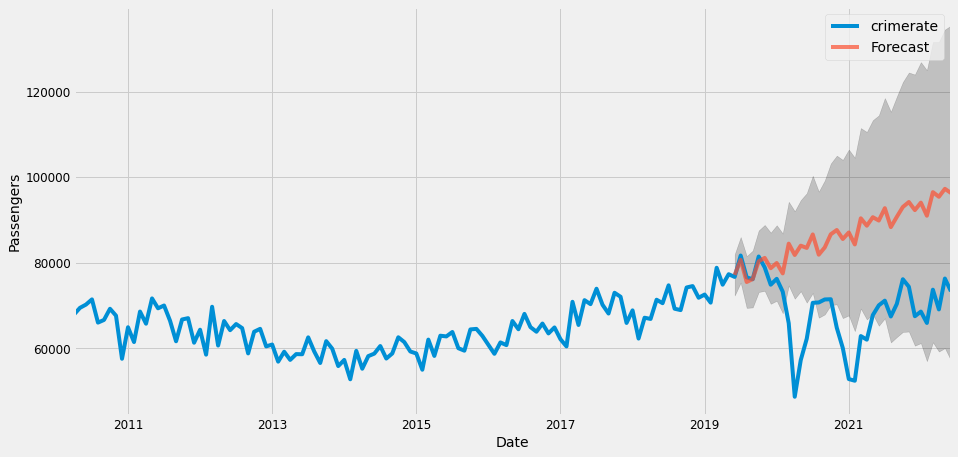

In [89]:
pred_ci = pred.conf_int()
ax = y['1949':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()

**Model diagnostics:**

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean.
If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.
The model diagnostic suggests that the model residual is normally distributed based on the following:

In the top right plot, the red KDE line follows closely with the N(0,1) line. Where, N(0,1) is the standard notation for a normal distribution with mean 0 and standard deviation of 1. This is a good indication that the residuals are normally distributed.
The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution. Again, this is a strong indication that the residuals are normally distributed.
The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise.
This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

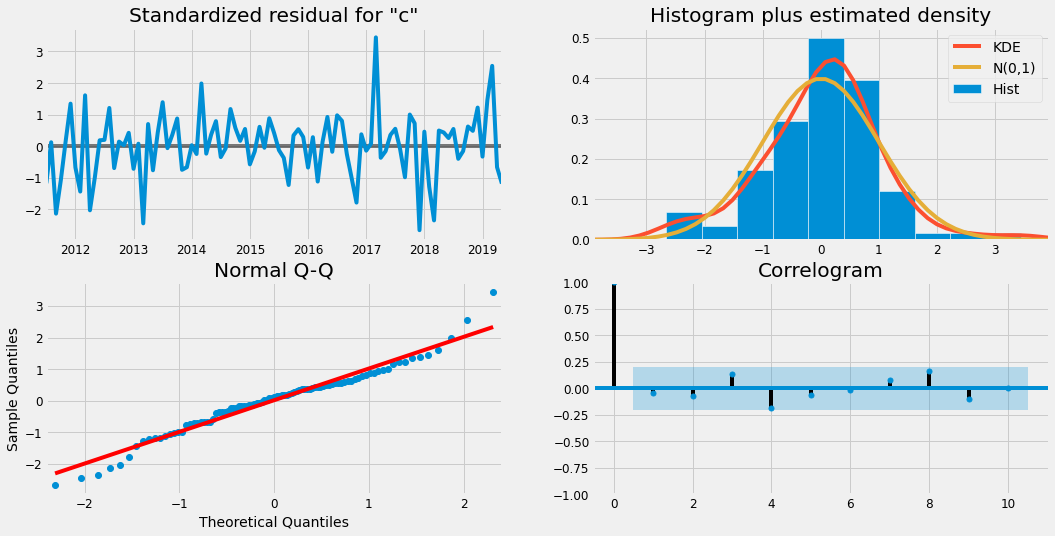

In [90]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [91]:
y_forecasted = pred.predicted_mean.values
y_truth = y[start_index:end_index].crimerate.values
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 411462693.3


In [92]:

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 20284.54


In [93]:
evaluate_forecast(y_truth, y_forecasted)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,-5.83719,17594.319058,20884.983419,4.114627e+08,0.073224,27.23066,20284.543212


# SARIMAX

[link text](https://towardsdatascience.com/end-to-end-time-series-analysis-and-forecasting-a-trio-of-sarimax-lstm-and-prophet-part-1-306367e57db8#:~:text=What%20is%20SARIMAX%3F,%2Daverage%20term%20(MA).)

The implementation is called SARIMAX instead of SARIMA because the “X” addition to the method name means that the implementation also supports exogenous variables.
Exogenous variables are optional can be specified via the “exog” argument.
model = SARIMAX(data, exog=other_data, ...)
Examples of exogenous variables: Population, holidays, number of airline companies, major events

# Prophet
Prophet is open source software released by Facebook's Core Data Science team.
Prophet is a procedure for forecasting time series data based on an additive/multiplicative model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.
It works best with time series that have strong seasonal effects and several seasons of historical data.
Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.
The Prophet package provides intuitive parameters which are easy to tune.

**Trend parameters**
growth: 'linear' or 'logistic' to specify a linear or logistic trend
changepoints: List of dates at which to include potential changepoints (automatic if not specified)
n_changepoints: If changepoints in not supplied, you may provide the number of changepoints to be automatically included
changepoint_prior_scale: Parameter for changing flexibility of automatic changepoint selection

Prophet requires the variable names in the time series to be:

y – Target
ds – Datetime

In [94]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt

In [95]:
data = pd.read_csv('/content/drive/MyDrive/GULCAN DOGAN DISERTATION /LONDON CRIME DATA /MPS Borough Level Crime sum .csv')

In [96]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['DATE'])
df['y'] = data['IPG2211A2N']

In [97]:
df.head()

,ds,y
0,2010-04-01,67901
1,2010-05-01,69468
2,2010-06-01,70230
3,2010-07-01,71448
4,2010-08-01,66019


In [98]:
m = Prophet()
m.fit(df)

16:43:25 - cmdstanpy - INFO - Chain [1] start processing
16:43:25 - cmdstanpy - INFO - Chain [1] done processing


In [99]:
future = m.make_future_dataframe(periods=12 * 6, freq='M')
future.tail()

,ds
214,2028-01-31
215,2028-02-29
216,2028-03-31
217,2028-04-30
218,2028-05-31


In [100]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
214,2028-01-31,59178.970778,51619.287835,66780.888467
215,2028-02-29,63738.816513,56084.614613,71486.630234
216,2028-03-31,64113.934407,56171.884241,71984.250463
217,2028-04-30,68031.509874,59716.148642,76647.852928
218,2028-05-31,67579.555975,59388.758754,75563.108731


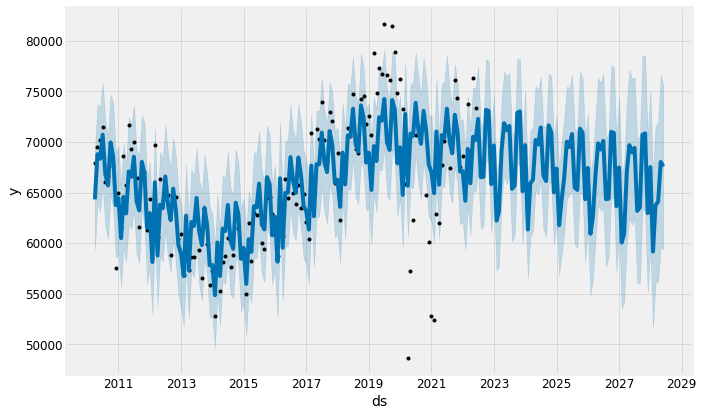

In [101]:

fig1 = m.plot(forecast)

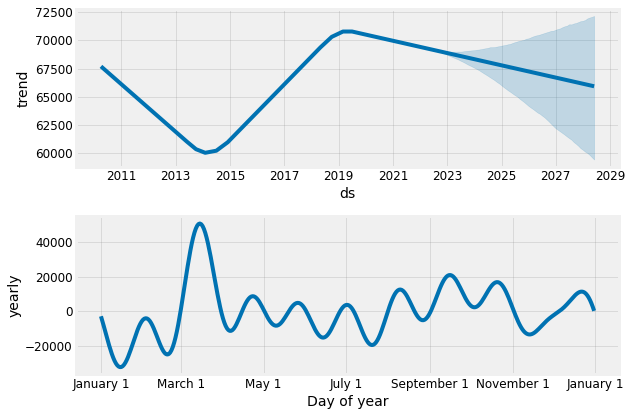

In [102]:
fig2 = m.plot_components(forecast)

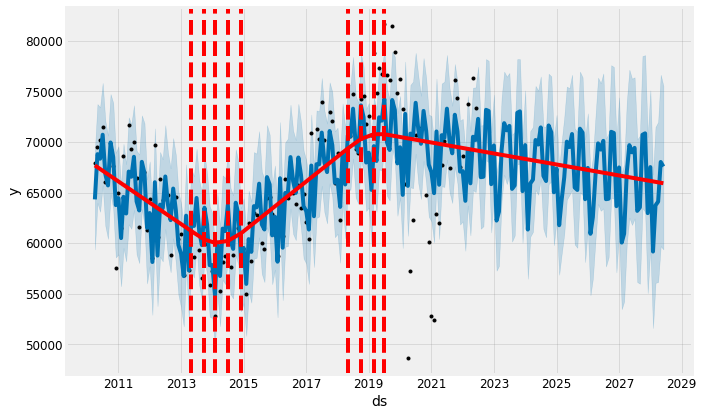

In [103]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

16:43:29 - cmdstanpy - INFO - Chain [1] start processing
16:43:29 - cmdstanpy - INFO - Chain [1] done processing
16:43:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
16:43:29 - cmdstanpy - INFO - Chain [1] start processing
16:43:29 - cmdstanpy - INFO - Chain [1] done processing


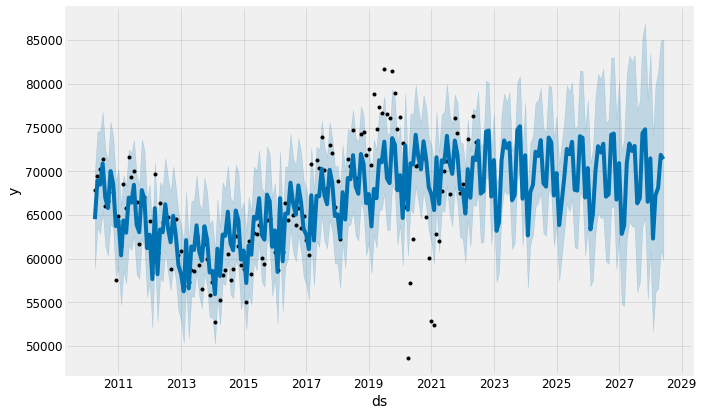

In [104]:
m = Prophet(n_changepoints=3).fit(df)
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
fig = m.plot(m.predict(future))

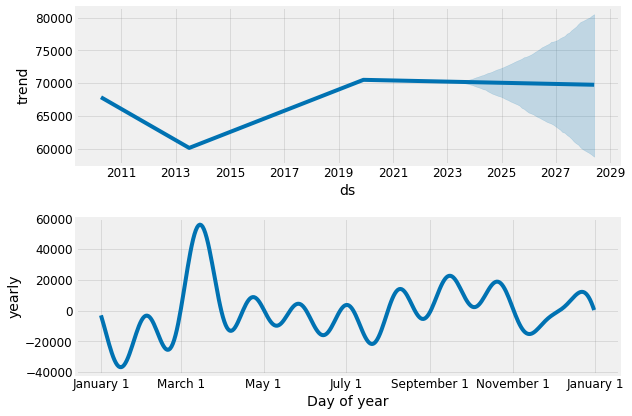

In [105]:
fig2 = m.plot_components(forecast)


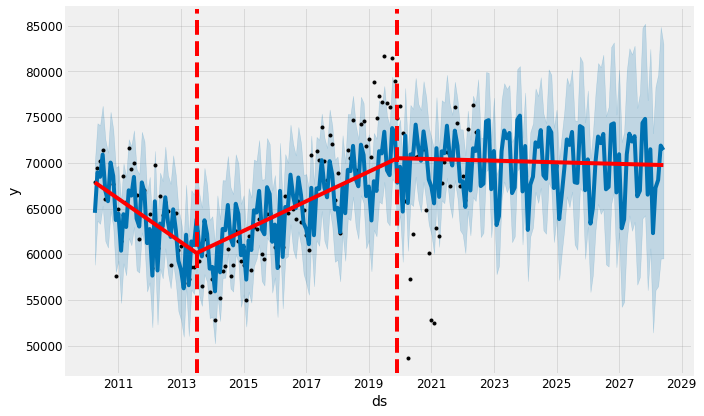

In [106]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

16:43:34 - cmdstanpy - INFO - Chain [1] start processing
16:43:34 - cmdstanpy - INFO - Chain [1] done processing
16:43:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
16:43:34 - cmdstanpy - INFO - Chain [1] start processing
16:43:34 - cmdstanpy - INFO - Chain [1] done processing


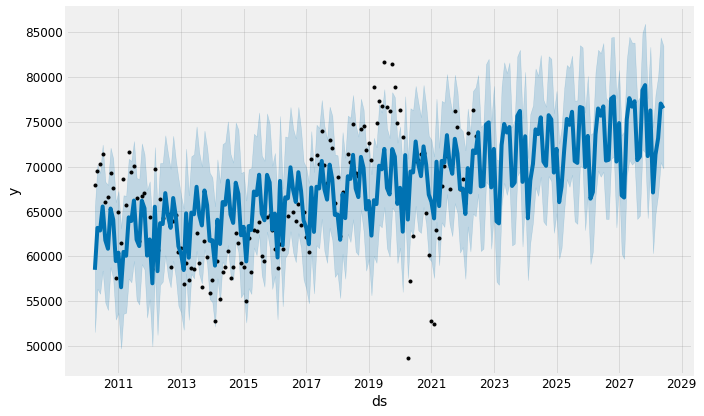

In [107]:
m = Prophet(changepoint_prior_scale=0.001).fit(df)
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)

16:43:36 - cmdstanpy - INFO - Chain [1] start processing
16:43:36 - cmdstanpy - INFO - Chain [1] done processing


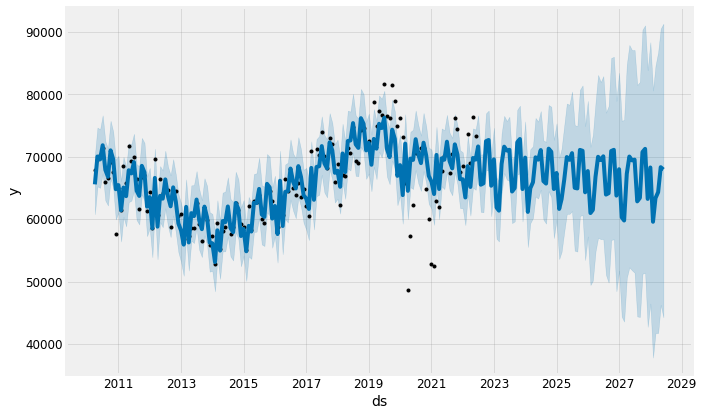

In [108]:
m = Prophet(changepoint_prior_scale=0.5).fit(df)
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)

16:43:39 - cmdstanpy - INFO - Chain [1] start processing
16:43:39 - cmdstanpy - INFO - Chain [1] done processing


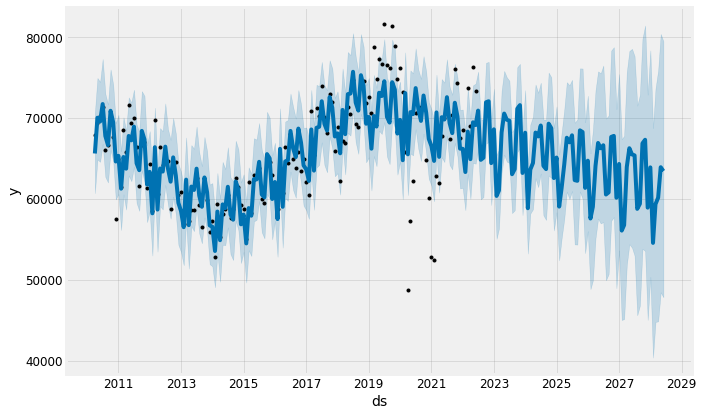

In [109]:
m = Prophet(changepoint_prior_scale=0.5, n_changepoints=7).fit(df)
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)

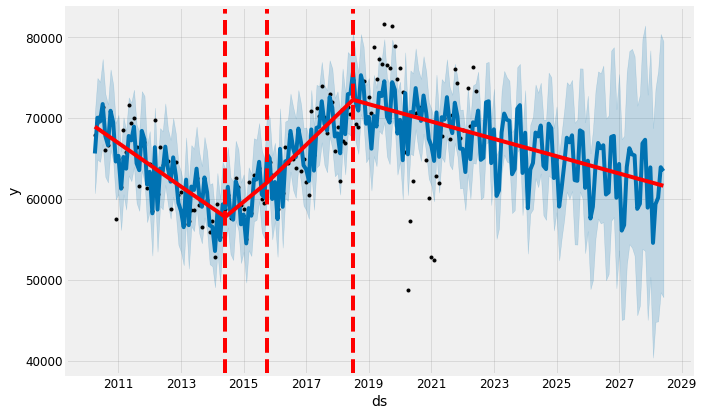

In [110]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

  0%|          | 0/19 [00:00<?, ?it/s]

16:43:41 - cmdstanpy - INFO - Chain [1] start processing
16:43:41 - cmdstanpy - INFO - Chain [1] done processing
16:43:43 - cmdstanpy - INFO - Chain [1] start processing
16:43:43 - cmdstanpy - INFO - Chain [1] done processing
16:43:44 - cmdstanpy - INFO - Chain [1] start processing
16:43:44 - cmdstanpy - INFO - Chain [1] done processing
16:43:46 - cmdstanpy - INFO - Chain [1] start processing
16:43:46 - cmdstanpy - INFO - Chain [1] done processing
16:43:48 - cmdstanpy - INFO - Chain [1] start processing
16:43:48 - cmdstanpy - INFO - Chain [1] done processing
16:43:49 - cmdstanpy - INFO - Chain [1] start processing
16:43:49 - cmdstanpy - INFO - Chain [1] done processing
16:43:51 - cmdstanpy - INFO - Chain [1] start processing
16:43:51 - cmdstanpy - INFO - Chain [1] done processing
16:43:52 - cmdstanpy - INFO - Chain [1] start processing
16:43:52 - cmdstanpy - INFO - Chain [1] done processing
16:43:54 - cmdstanpy - INFO - Chain [1] start processing
16:43:54 - cmdstanpy - INFO - Chain [1]

In [ ]:
df_p = performance_metrics(df_cv)
df_p.head()

In [ ]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
m = Prophet(changepoint_prior_scale=.001, n_changepoints=0).fit(df)
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)

In [ ]:
changepoint_prior_scales = [.005, .05, .5, 2]
n_changepoints = [8, 10, 15, 20, 25]

rmse = []
for changepoint_prior_scale in changepoint_prior_scales:
    for n_changepoint in n_changepoints:
        print('Changepoint Prior Scale:', changepoint_prior_scale)
        print('Number Changepoints:', n_changepoint)
        m = Prophet(changepoint_prior_scale=changepoint_prior_scale, n_changepoints=n_changepoint).fit(df)
        future = m.make_future_dataframe(periods=12 * 6, freq='M')
        forecast = m.predict(future)
        fig = m.plot(forecast)
        a = add_changepoints_to_plot(fig.gca(), m, forecast)
        plt.show()
        df_cv = cross_validation(m, initial='1095 days', period='180 days', horizon = '365 days')
        df_p = performance_metrics(df_cv)
        rmse.append((df_p['rmse'].mean(), {'changepoint_prior_scale': changepoint_prior_scale, 'n_changepoint': n_changepoint}))
        fig = plot_cross_validation_metric(df_cv, metric='mape')
        plt.show()

In [ ]:
rmse

In [ ]:
#dataframe of annual US Public Holidays over training and forecasting periods 

ny = pd.DataFrame({'holiday': "New Year's Day", 'ds' : pd.to_datetime(['2016-01-01', '2017-01-01'])})  
mlk = pd.DataFrame({'holiday': 'Birthday of Martin Luther King, Jr.', 'ds' : pd.to_datetime(['2016-01-18', '2017-01-16'])}) 
wash = pd.DataFrame({'holiday': "Washington's Birthday", 'ds' : pd.to_datetime(['2016-02-15', '2017-02-20'])})
mem = pd.DataFrame({'holiday': 'Memorial Day', 'ds' : pd.to_datetime(['2016-05-30', '2017-05-29'])})
ind = pd.DataFrame({'holiday': 'Independence Day', 'ds' : pd.to_datetime(['2015-07-04', '2016-07-04', '2017-07-04'])})
lab = pd.DataFrame({'holiday': 'Labor Day', 'ds' : pd.to_datetime(['2015-09-07', '2016-09-05', '2017-09-04'])})
col = pd.DataFrame({'holiday': 'Columbus Day', 'ds' : pd.to_datetime(['2015-10-12', '2016-10-10', '2017-10-09'])})
vet = pd.DataFrame({'holiday': "Veteran's Day", 'ds' : pd.to_datetime(['2015-11-11', '2016-11-11', '2017-11-11'])})
thanks = pd.DataFrame({'holiday': 'Thanksgiving Day', 'ds' : pd.to_datetime(['2015-11-26', '2016-11-24'])})
christ = pd.DataFrame({'holiday': 'Christmas', 'ds' : pd.to_datetime(['2015-12-25', '2016-12-25'])})

holidays = pd.concat([ny, mlk, wash, mem, ind, lab, col, vet, thanks, christ])

In [ ]:
prophet = Prophet(growth='linear',
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
#                   holidays=holidays,
                  seasonality_mode='multiplicative',
                  seasonality_prior_scale=10,
                  holidays_prior_scale=10,
                  changepoint_prior_scale=.05,
                  mcmc_samples=0
                  ).add_seasonality(name='quarterly',
                                    period=365.25 / 4,fourier_order=15
                  )
prophet.fit(df)
future = prophet.make_future_dataframe(periods=12 * 6, freq='M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
df_cv = cross_validation(prophet, initial='1095 days', period='180 days', horizon = '365 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()